In [3]:
import sys 
sys.path.append('./models/')
from SIR import SIRD_model, sir_for_optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [4]:
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [5]:
mymodel = SIRD_model()  
mymodel.train(dates_of_pandemic[:33], new_deaths[:33])

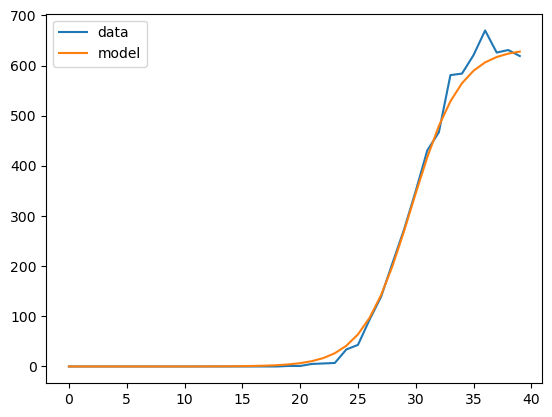

In [ ]:
plt.plot(dates_of_pandemic[:40], new_deaths[:40], label='data')
pred=sir_for_optim(np.array([i for i in range(40)]), mymodel.beta, mymodel.gamma, mymodel.d)
plt.plot(dates_of_pandemic[:40], pred, label='model')
plt.legend()
plt.show()

In [ ]:
pred, ints=mymodel.predict(7,0.05)

In [ ]:
ints

[array([50.49856434, 53.35080294, 55.55059545, 57.20375402, 58.42187209,
        59.30629012, 59.94140171]),
 array([1555.32097224, 1686.763347  , 1757.95746236, 1793.36642858,
        1809.53038542, 1815.84952018, 1817.25406338])]

In [ ]:
print(mymodel.beta, mymodel.gamma, mymodel.d)
print(mymodel.beta_sampled)

0.47469723435052485 6.174381198149415e-17 0.000639401603284344
[0.5427784550278295, 0.4905347999390904, 0.3597061920900716, 0.6014465816722958, 0.40552725109837695, 0.5008670548956115, 0.501089688427999, 0.4977860080450055, 0.5287502070715903, 0.5367414582002812, 0.688909579961102, 0.5358098910126373, 0.5818193360562819, 0.3766937047107865, 0.5542875338496116, 0.49973726691809506, 0.702934517255772, 0.5095117763395136, 0.5185405032131112, 0.42695681868861657, 0.4628271060181261, 0.7422662856108247, 0.6147981053662266, 0.5276012486589833, 0.5906548934009206, 0.565852496640778, 0.3692036238385368, 0.4516140574569732, 0.4308066072808562, 0.462746066416926, 0.4656541020446572, 0.4738574159636045, 0.645902785233652, 0.40491354850356526, 0.7641337456972628, 0.40104639300744094, 0.7029070422476142, 0.6272729303149813, 0.3952241108692677, 0.6085597495488907, 0.5558923619432394, 0.5298993620246694, 0.7558705959889198, 0.40058634367806345, 0.5342923936823795, 0.39752502734774714, 0.5016508789275

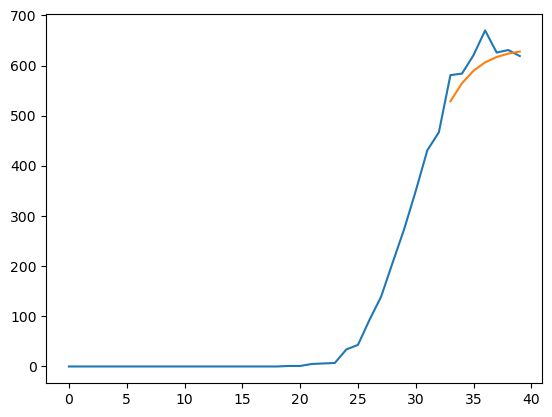

In [ ]:
plt.plot(dates_of_pandemic[:40], new_deaths[:40], label='data')
plt.plot(dates_of_pandemic[33:40], pred, label='model')

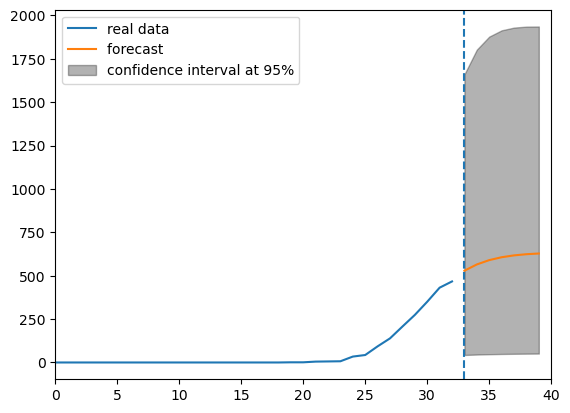

In [ ]:
mymodel.plot(7,0.05)

In [ ]:
beta=mymodel.beta
gamma=mymodel.gamma
d=mymodel.d

pred=sir_for_optim(np.array([i for i in range((122))]), beta, gamma, d)

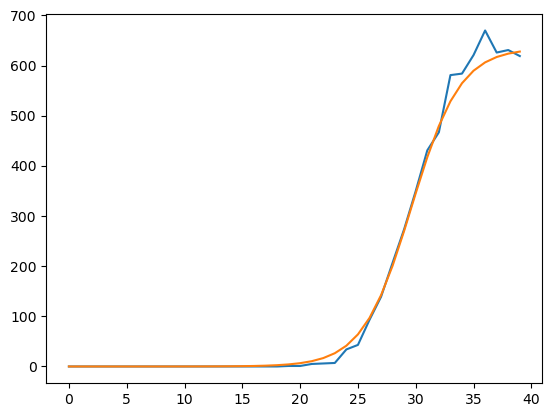

In [ ]:
plt.plot(new_deaths[:40])
plt.plot(pred[:40])

In [ ]:
def exponential_func(x, a, b, c):
    return a*np.exp(b*x)+c

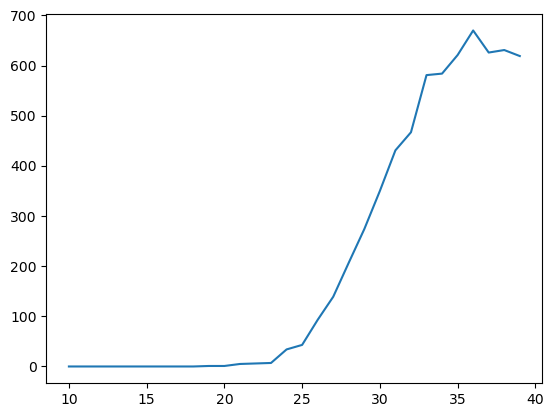

In [ ]:
plt.plot(dates_of_pandemic[10:40], new_deaths[10:40])

[  1.27331544   0.18555633 -34.72327539]


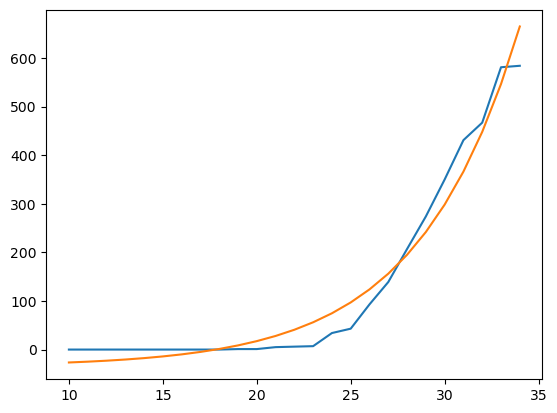

In [ ]:
min=10
max=35
interval=[i for i in range(min,max)]
p, _ =curve_fit(exponential_func, dates_of_pandemic[interval], new_deaths[interval], p0=[ 1.33991316e+01 , 1.21453531e-01,  -1.92062731e+02]

, maxfev = 10000)
print(p)
plt.plot(dates_of_pandemic[interval], new_deaths[interval])
plt.plot(dates_of_pandemic[interval], exponential_func(dates_of_pandemic[interval], *p))

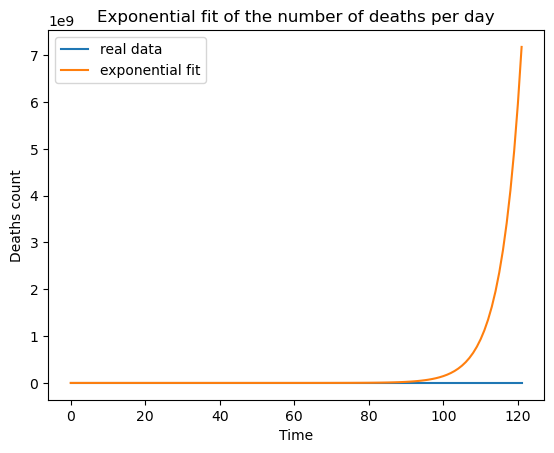

In [ ]:
plt.plot(dates_of_pandemic,new_deaths, label='real data')
plt.plot(dates_of_pandemic, exponential_func(dates_of_pandemic, *p), label= 'exponential fit')
plt.title('Exponential fit of the number of deaths per day')
plt.xlabel('Time')
plt.ylabel('Deaths count')

plt.legend()
plt.show()

In [1]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import *
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

covariance method


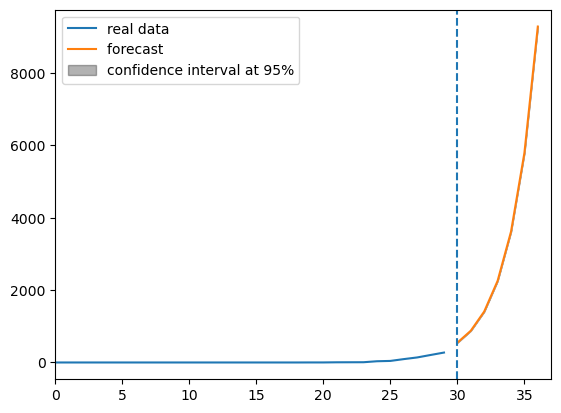

In [8]:
myexp=ExponentialRegression()
myexp.train(dates_of_pandemic[:30], new_deaths[:30])
myexp.plot(7,0.05)


hessian


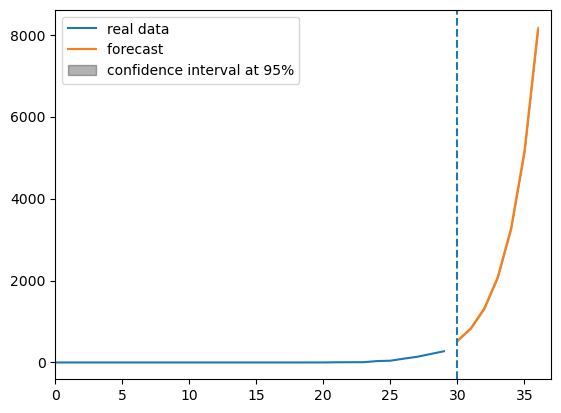

In [ ]:

myexp=ExponentialRegression()
myexp.train(dates_of_pandemic[:30], new_deaths[:30])
myexp.plot(7,0.05)


In [ ]:
import scipy.stats
scipy.stats.norm.ppf(0.05)
scipy.stats.norm.ppf(0.05, loc=2, scale=1)

0.35514637304852714

covariance method


c:\Users\grego\Documents\code\covid_internship\./models\exponential_regression.py:17: RuntimeWarning: overflow encountered in exp
  return a*np.exp(b*(x-d))+c
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


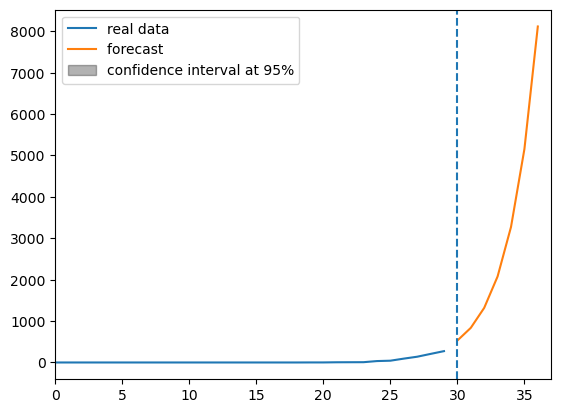

In [ ]:

myexp=ExponentialRegression()
myexp.train(dates_of_pandemic[:30], new_deaths[:30])
myexp.plot(7,0.05)


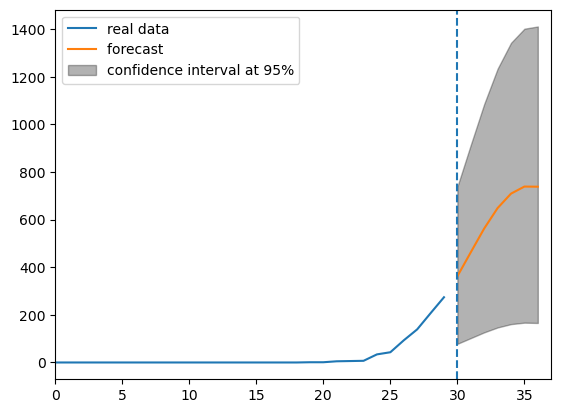

In [9]:
mysird2=SIRD_model_2()
mysird2.train(dates_of_pandemic[:30], new_deaths[:30])
mysird2.plot(7,0.05)

c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


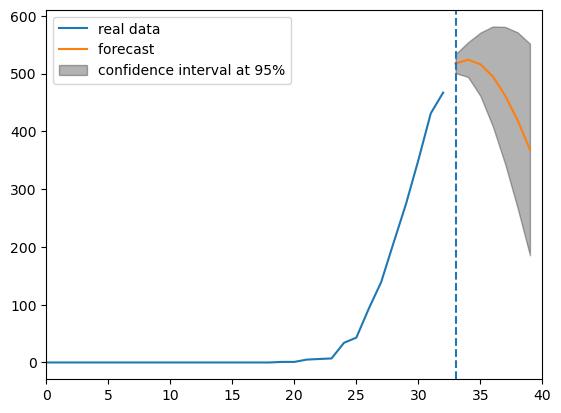

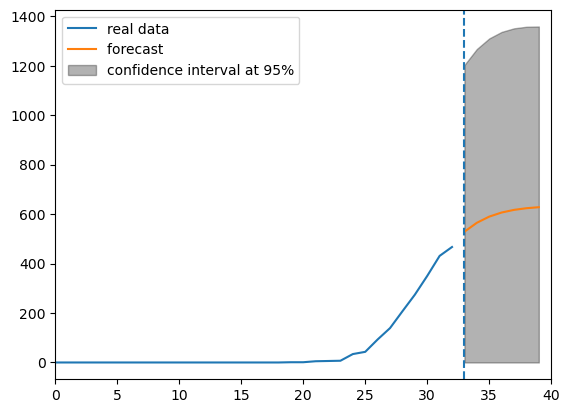

hessian


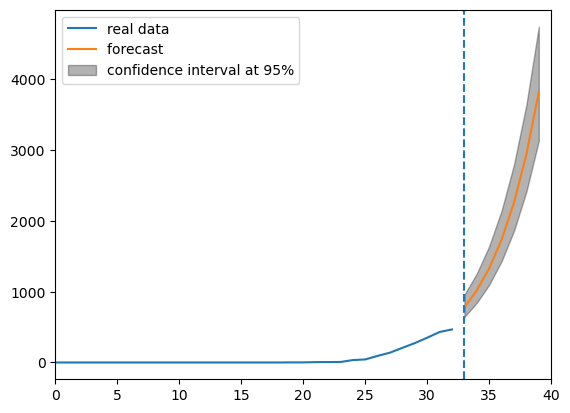

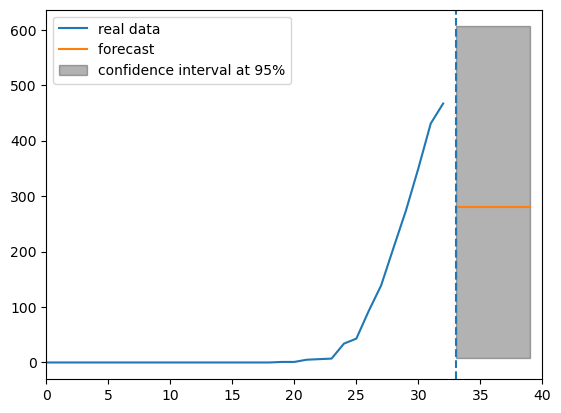

In [ ]:
myarima=ARIMA_Model()
mySIRD=SIRD_model()
myexp=ExponentialRegression()
mymoving=MovingAverage()
myarima.train(dates_of_pandemic[:33], new_deaths[:33])
mySIRD.train(dates_of_pandemic[:33], new_deaths[:33])
myexp.train(dates_of_pandemic[:33], new_deaths[:33])
mymoving.train(dates_of_pandemic[:33], new_deaths[:33])
myarima.plot(7,0.05)
mySIRD.plot(7,0.05)
myexp.plot(7,0.05)
mymoving.plot(7,0.05)

In [14]:
y

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   5.,
         6.,   7.,  34.,  43.,  93., 139., 207., 274., 350., 431., 467.])

**Evaluating models**

In [ ]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import SIRD_model
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
import pandas as pd
import numpy as np
from evaluate_model import evaluate_model
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))



In [ ]:
myarima=ARIMA_Model()
mysir=SIRD_model()
myexp=ExponentialRegression()
mymoving=MovingAverage()
alphas=[0.05,0.1,0.5]
index_points=[40,50,75]
reach=7
weights=[1,1,1,1]


In [ ]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

hessian
hessian
hessian
hessian
hessian
hessian
hessian
hessian
hessian


1074.445379464554

In [ ]:
evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

40
hessian
hessian
hessian
50
hessian
hessian
hessian
75
hessian
hessian
hessian


1.6293653374016092e+137

In [ ]:
evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


259.0615781299235

In [ ]:
evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

2359.0683868254123